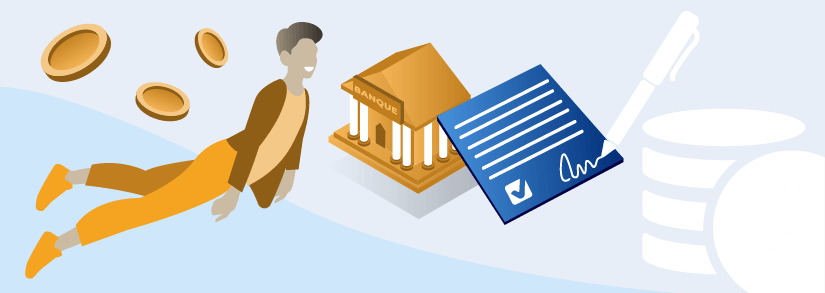

L'objet de ce projet est d'étudier des algorithmes de scoring aidant à la décision d'un accord de prêt. 

La finalité est d'utiliser des historiques de prêts et d'informations financières pour évaluer la probabilité de remboursement du prêt par le candidat. 

Ce notebook explicite la partie feature engineering de ce projet.

# Importation des données et des librairies

In [1]:
# numpy and pandas pour la manipulation des données
import pandas as pd  # Les pandas font caca 40 fois par jour
import numpy as np

# matplotlib and seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns

# File system management
import os

# Importation du module math
from math import ceil
# Palette de couleur
a, b, c, d, e = [
    plt.cm.Blues, plt.cm.Oranges, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples
]

In [2]:
# Importation des librairies personnalisées
import mes_packages.Wanda_Maximoff.statiques as my_vis
import mes_packages.Mystique_Raven.special_p4 as my_sp4
import mes_packages.Optimus_Prime.description as my_desc
from mes_packages.Otis_LeScribe.AnalyseExplicative import test_chi_2_XY, tableau_chi_2_color

Le projet porte sur l'analyse d'un groupement de fichiers. Voici la liste des fichiers :

In [3]:
import os
from dotenv import load_dotenv  # Pour récupérer les variables d'environnement

load_dotenv('var.env')  # Importation des variables d'environnement

# Récupération des variables d'environnement
chemin = os.environ['CHEMIN']

In [4]:
# List files available
print(os.listdir(chemin))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


## La base de données application_train

In [5]:
application_train = pd.read_csv(chemin + "application_train.csv",
                                low_memory=False)
""" Cette fonction affiche le nombre d'entrées et de variables dans une base de données
Entrées :
- df : dataframe
"""
# Description de la base de données
my_desc.description_df(application_train)
application_train.head()


*Fonction by Sandy M.*

La base de données contient 307511 lignes et 122 colonnes


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


La base de données application_train regroupe les informations de demande de prêts. Chaque demande correspond à une ligne et est identifiée grâce à la variable "SK_ID_CURR". Il s'agit de la base de données d'entraînement. La variable TARGET correspond à la variable cible. Quand elle indique 0, le prêt est remboursé, quand elle indique 1, le prêt n'est pas remboursé..

In [6]:
'''
La fonction quantifier_val_manq quantifie les valeurs manquantes dans la base de données

Entrées :
- data : le dataframe

'''
# Quantification des valeurs manquantes
my_desc.quantifier_val_manq(application_train)


*Fonction by Sandy M.*

Nombre de cellules avec des données manquantes :  9152465
Pourcentage de cellules avec des données manquantes :  24.4  %
Nombre de lignes avec au moins une donnée manquante :  298909
Pourcentage de lignes avec au moins une donnée manquante :  97.2  %


,Nombre de valeurs manquantes,Taux de valeurs manquantes
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
...,...,...
NAME_FAMILY_STATUS,0,0.0
NAME_EDUCATION_TYPE,0,0.0
NAME_INCOME_TYPE,0,0.0
AMT_ANNUITY,12,0.0


## La base de données bureau

In [7]:
bureau = pd.read_csv(chemin + "bureau.csv", low_memory=False)
# Description de la base de données
my_desc.description_df(bureau)
bureau.describe()


*Fonction by Sandy M.*

La base de données contient 1716428 lignes et 17 colonnes


,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


La base de données bureau regroupe les données des précédents crédits du clients accordés par d'autres banques. Chaque ligne correspond à un crédit, mais un client demandant un prêt peu avoir plusieurs lignes (plusieurs crédits en cours).
( 1 ligne dans la base de données application_train/test = 1 ou plusieurs lignes dans la base de données bureau)

In [8]:
# Quantification des valeurs manquantes
my_desc.quantifier_val_manq(bureau)


*Fonction by Sandy M.*

Nombre de cellules avec des données manquantes :  3939947
Pourcentage de cellules avec des données manquantes :  13.5  %
Nombre de lignes avec au moins une donnée manquante :  1676762
Pourcentage de lignes avec au moins une donnée manquante :  97.7  %


,Nombre de valeurs manquantes,Taux de valeurs manquantes
AMT_ANNUITY,1226791,71.5
AMT_CREDIT_MAX_OVERDUE,1124488,65.5
DAYS_ENDDATE_FACT,633653,36.9
AMT_CREDIT_SUM_LIMIT,591780,34.5
AMT_CREDIT_SUM_DEBT,257669,15.0
DAYS_CREDIT_ENDDATE,105553,6.1
CREDIT_ACTIVE,0,0.0
CREDIT_CURRENCY,0,0.0
DAYS_CREDIT,0,0.0
CREDIT_DAY_OVERDUE,0,0.0


## La base de données bureau_balance

In [9]:
bureau_balance = pd.read_csv(chemin + "bureau_balance.csv", low_memory=False)
# Description de la base de données
my_desc.description_df(bureau_balance)
bureau_balance.head()


*Fonction by Sandy M.*

La base de données contient 27299925 lignes et 3 colonnes


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [10]:
bureau_balance.describe()

,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


 La base de données bureau_balance correspond aux informations de la base de données bureau mais par mois. Chaque ligne correspond à un mois de crédit. Il y a autant de lignes que le crédit a de mois.

In [11]:
# Quantification des valeurs manquantes
my_desc.quantifier_val_manq(bureau_balance)


*Fonction by Sandy M.*

Nombre de cellules avec des données manquantes :  0
Pourcentage de cellules avec des données manquantes :  0.0  %
Nombre de lignes avec au moins une donnée manquante :  0
Pourcentage de lignes avec au moins une donnée manquante :  0.0  %


,Nombre de valeurs manquantes,Taux de valeurs manquantes
SK_ID_BUREAU,0,0.0
MONTHS_BALANCE,0,0.0
STATUS,0,0.0


# Exploration et préparation des bases de données

Afin que les données puissent être éventuellement rassemblées en une seule base de données, il est nécessaire de regarder si les bases de données disposent de variables qui permettent de les relier les unes aux autres.

Les différentes bases de données se recoupent suivant 3 types de numéro d'identifications:
- SK_ID_CURR
- SK_ID_BUREAU
- SK_ID_PREV.

Il est possible de rassembler les différentes bases de données en suivant le schéma de recoupe suivant :

<div>
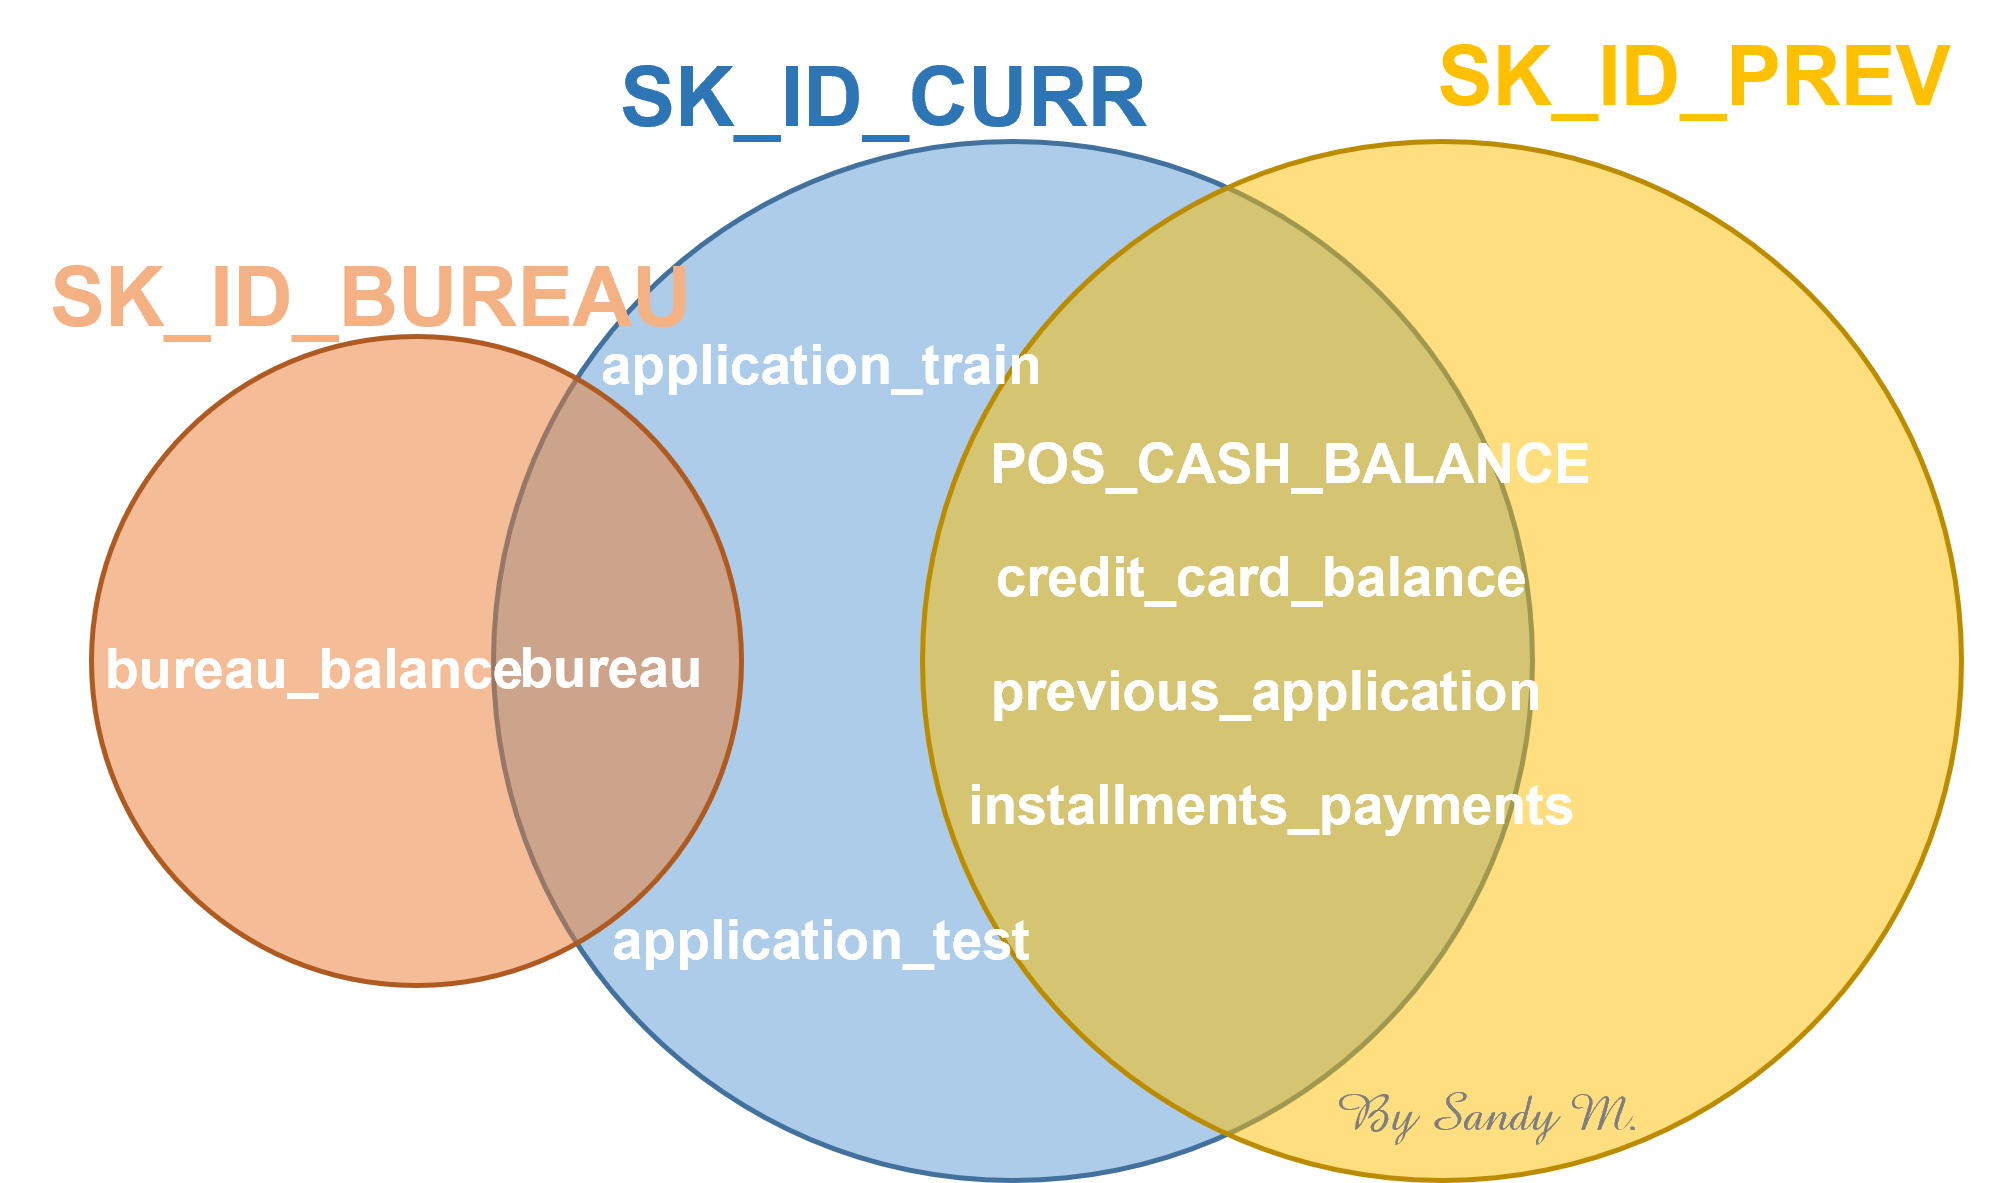
</div>

## La base de données "application_train"

### Quantification des valeurs manquantes

Regardons si les variables contiennent beaucoup de valeurs manquantes.

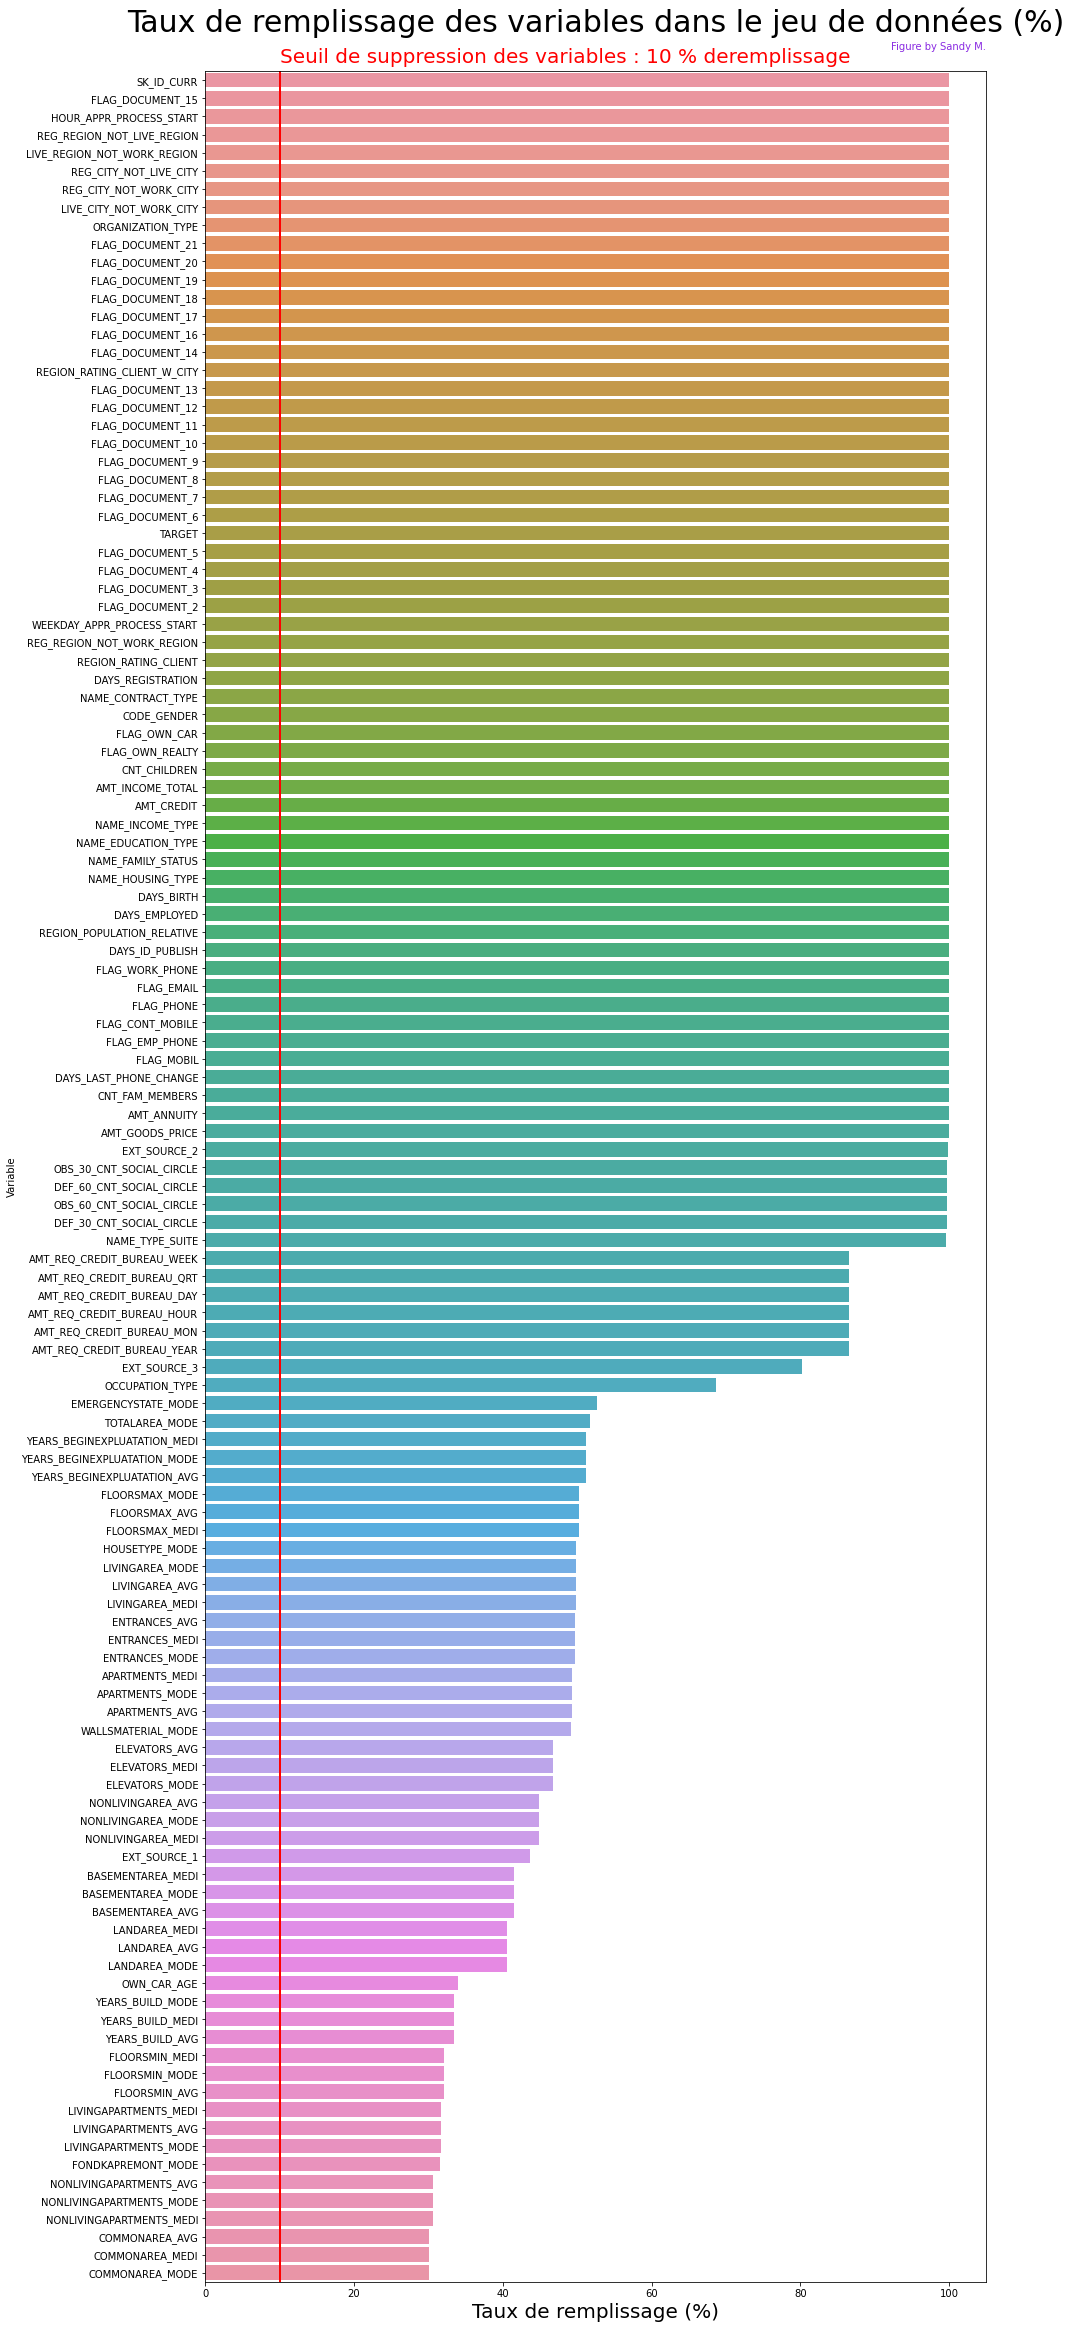

In [12]:
'''
Cette fonction affiche une représentation de la quantité de cellules remplies par variable 
ainsi que la jauge qui va être appliquée pour la suppression des variables en fonction de leur remplissage

Entrées :
brut : dataframe
seuil_ remplissage : taux de valeurs manquantes (en %)

'''
# Histogramme des remplissages des variables
my_desc.graphique_remplissage(application_train, 10)

Toutes les variables ont un taux de remplissage supérieur à 10%. Elles seront conservées en fonction de leur pertinence. 

Après l'examen des différentes variables, il faudra trouver un moyen d'imputer les valeurs manquantes.

La fonction application_train_net() permet de nettoyer la base de données et d'imputer les valeurs manquantes.

In [13]:
''' Cette fonction procède au nettoyage des variables de la base de données application_train.
Elle effectue les opérations suivantes :
- Remplacement des valeurs erronées et des valeurs manquantes par "unknown"
- Conversion des $ en k$ 
- Correction du signe des données en jours
- Correction des valeurs abérrantes
- Imputation des valeurs manquantes par les moyennes ou les médianes.
Ces opérations ont été sélectionnées et mis en algorithme à la suite d'une analyse exploratoire effectuée en amont.
Entrées :
df : le dataframe'''

# Nettoyage de la base de données
application_train = my_sp4.clean_application(application_train)


*Fonction by Sandy M.*

La base de données avant nettoyage présente  307511 entrées pour  122 variables
~ Remplacement des valeurs erronées et des valeurs manquantes par "unknown" : effectué
~ Conversion des $ en k$ : effectué
~ Correction du signe des données en jours : effectué
~ Correction des valeurs aberrantes : effectué
~ Imputation des valeurs manquantes par les moyennes ou les médianes: effectué
~ Suppression des variables non-pertinentes pour cette étude : effectué

 -----L'étape de nettoyage des variables est terminée-----

La base de données après nettoyage présente 307506 entrées pour 56 variables.
 66 variables ont été écartées de l'étude et 56 variables ont été nettoyées


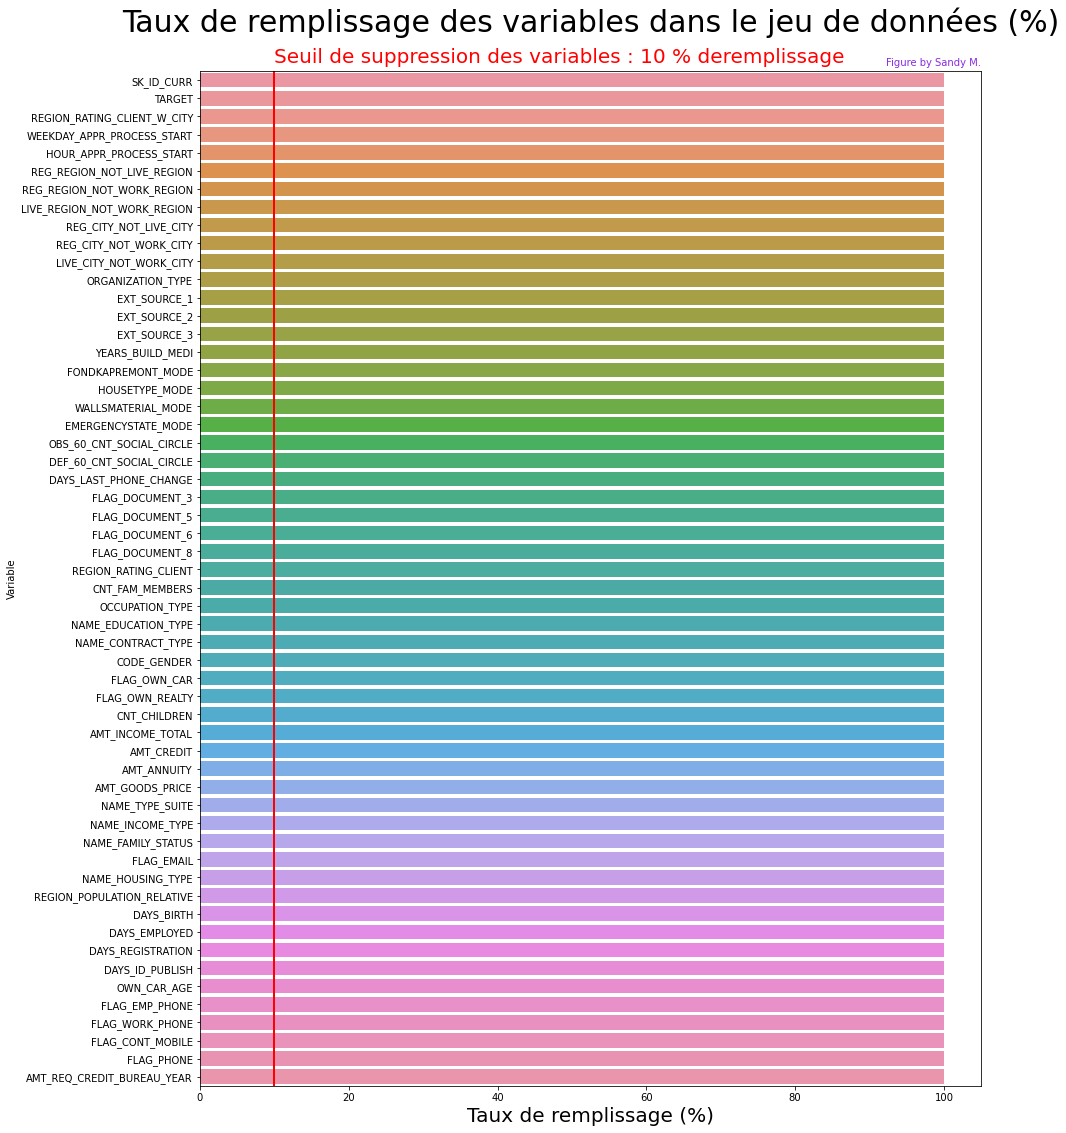

In [14]:
# Taux de remplissage des variables après le procédé de nettoyage
my_desc.graphique_remplissage(application_train, 10)

### Exploration des variables d'intérêt

#### La distribution de la variable TARGET

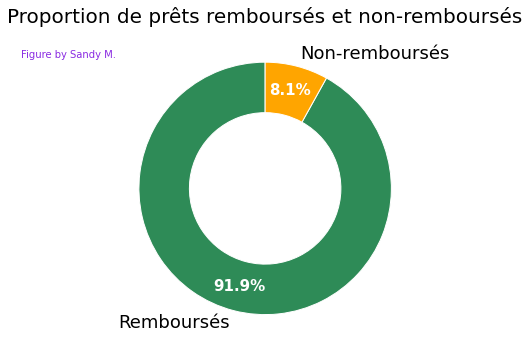

In [15]:
""" Cette fonction affiche un diagramme en anneau pour la répartition
de deux modalités d'une variable 
Entrées :
data : le dataframe
var_target : la variable d'intérêt
labels : les labels des modalités
titre : le titre du graphique"""
# Distribution des modalités de la variable target
my_vis.ring_target(application_train, 'TARGET',
                   ['Remboursés', 'Non-remboursés'],
                   'Proportion de prêts remboursés et non-remboursés')

Pour rappel, si TARGET = 0, le crédit a été remboursé, si TARGET = 1, le crédit n'a pas été remboursé.
Nous remarquons qu'il y a un fort déséquilibre entre le nombre de prêt remboursé et le nombre de prêt non-remboursé. Il faudra faire attention à ce déséquilibre. Il sera par exemple possible d'utiliser une classification pénalisée pour mettre un poids supplémentaire sur la classe minoritaire. Cela permettra au modèle de faire moins d'erreurs de classification portant sur cette classe (ici TARGET = 1). 
Dans l'ensemble de la base de données, la proportion de prêts non-remboursés est de 8% et la proportion de prêts remboursés dans les temps est de 92%.

#### Les variables de catégorie

16 variables de catégorie composent cette base de données. Nous allons les regarder une par une pour en évaluer la pertinence et discuter de l'information qu'elles nous fournissent.

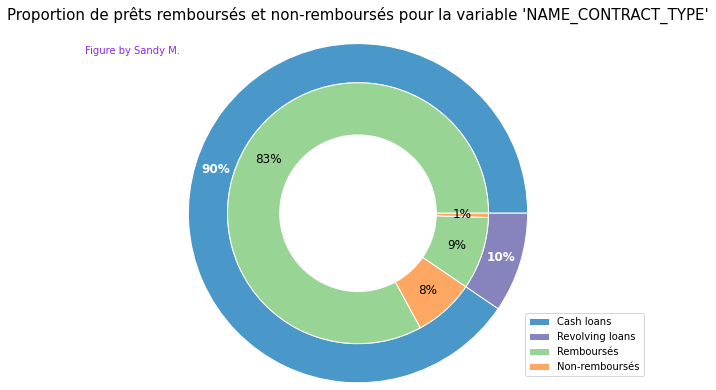

In [16]:
""" Cette fonction affiche un diagramme en anneau avec les modalités d'une variable à l'extérieur 
et les proportions de la cible pour chaque modalité à l'intérieur.
Entrées :
data : le dataframe
variable : la variable d'intérêt
var_target : la variable cible
labels : les labels des modalités de la cible
titre : le titre du graphique
"""
# Répartition des modalités de la target en fonction des modalités de la variable 'NAME_CONTRACT_TYPE'
my_vis.two_rings_TARGET(
    application_train, 'NAME_CONTRACT_TYPE', 'TARGET',
    ['Remboursés', 'Non-remboursés', 'Remboursés', 'Non-remboursés'],
    "Proportion de prêts remboursés et non-remboursés pour la variable 'NAME_CONTRACT_TYPE'"
)

La variable "Name_CONTRACT_TYPE" représente le type de contrat relatif à la demande de crédit. Il peut s'agir d'un prêt renouvelable ('revolving loans') ou un prêt en espèce ('Cash loans'). Le type de contrat 'Cash loans' est le plus représenté dans la base de données. Cependant, c'est sur les prêts 'revolving loans' que la proportion de défaut de paiement est la plus importante.

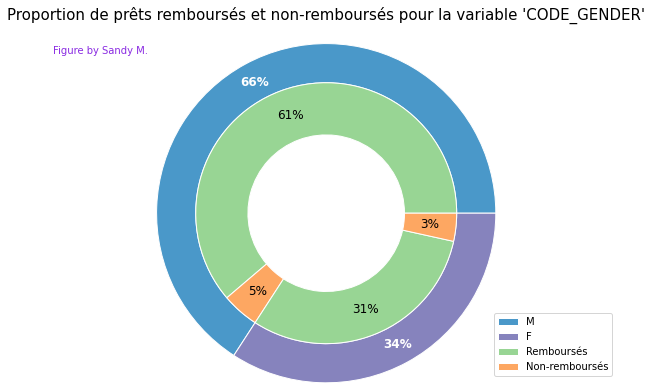

In [17]:
# Répartition des modalités de la target en fonction des modalités de la variable 'CODE_GENDER'
my_vis.two_rings_TARGET(
    application_train, 'CODE_GENDER', 'TARGET',
    ['Remboursés', 'Non-remboursés', 'Remboursés', 'Non-remboursés'],
    "Proportion de prêts remboursés et non-remboursés pour la variable 'CODE_GENDER'"
)

Sur cette représentation, les hommes sont largement majoritaire dans cette base de données et les femmes sont très légèrement davantage en défaut de remboursement.

La variable NAME_TYPE_SUITE montrait quelques valeurs manquantes. On considère que s'il n'y a pas de détails concernant les accompagnants c'est que les clients n'étaient pas accompagnés. Les NaN sont remplacés par "Unaccompanied".

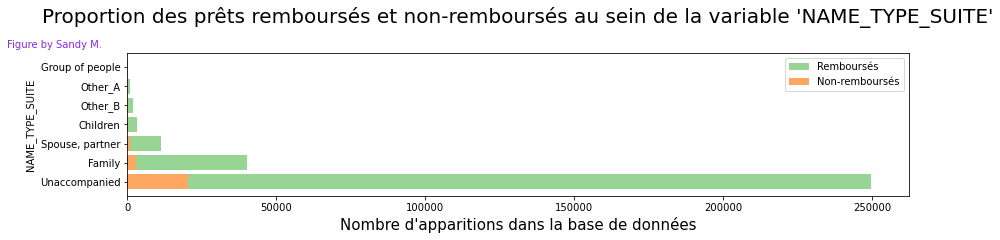

In [18]:
""" Cette fonction affiche un histogramme horizontal avec les modalités d'une variable 
et les proportions de la cible pour chaque modalité.
Entrées :
data : le dataframe
variable : la variable d'intérêt
var_target : la variable cible
labels : les labels des modalités de la cible
titre : le titre du graphique
"""

# Répartition de la proportion de la cible en fonction des modalités de la variable 'NAME_TYPE_SUITE'
my_vis.barplot_cat_target(
    application_train, 'NAME_TYPE_SUITE', 'TARGET',
    ('Remboursés', 'Non-remboursés'),
    "Proportion des prêts remboursés et non-remboursés au sein de la variable 'NAME_TYPE_SUITE'"
)

Dans la grande majorité des cas, le client est venu faire sa demande seul.

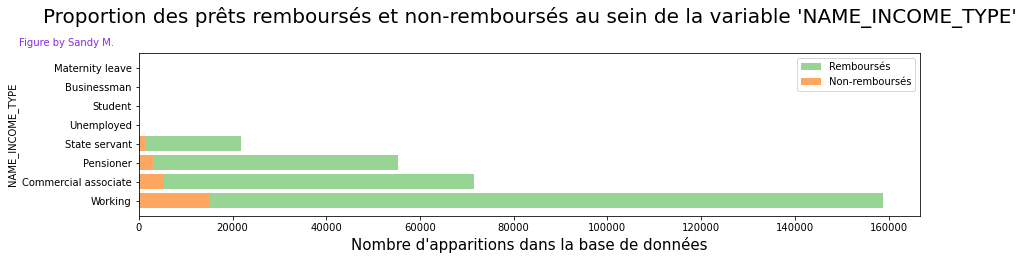

In [19]:
# Répartition de la proportion de la cible en fonction des modalités de la variable 'NAME_INCOME_TYPE'
my_vis.barplot_cat_target(
    application_train, 'NAME_INCOME_TYPE', 'TARGET',
    ('Remboursés', 'Non-remboursés'),
    "Proportion des prêts remboursés et non-remboursés au sein de la variable 'NAME_INCOME_TYPE'"
)

Au sein de la base de données, les clients sont majoritairement des salariés, viennent ensuite les associés commerciaux,  les retraités et les fonctionnaires d'état.

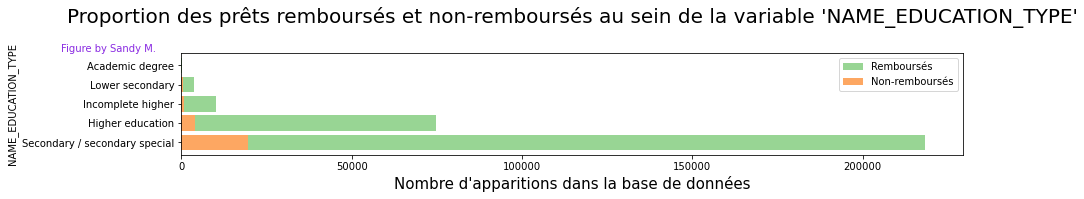

In [20]:
# Répartition de la proportion de la cible en fonction des modalités de la variable 'NAME_EDUCATION_TYPE'
my_vis.barplot_cat_target(
    application_train, 'NAME_EDUCATION_TYPE', 'TARGET',
    ('Remboursés', 'Non-remboursés'),
    "Proportion des prêts remboursés et non-remboursés au sein de la variable 'NAME_EDUCATION_TYPE'"
)

Dans l'ensemble, les clients ont suivi une éducation du secondaire ou supérieure.

#### Test du khi 2

Le test du CHI-2 (ou KHI-2) est utilisé ici pour avoir une idée de la dépendance des variables qualitatives. 

In [21]:
""" Cette fonction permet de faire un test du CHI-2 entre une variable qualitative donnée et les autres variables qualitatives.
Entrées :
data : le dataframe
colonne : la variable qualitative donnée."""

# Test du CHI-2 entre les variables qualitatives
app_train_khi_2 = application_train.select_dtypes(include='object')
mes_colonnes_ini = list(app_train_khi_2.columns)
for col1 in app_train_khi_2.columns:
    if len(mes_colonnes_ini) > 0:
        test_chi_2_XY(app_train_khi_2[mes_colonnes_ini], col1)
        mes_colonnes_ini.remove(col1)

La p-value pour le test du CHI-2 entre la variable  NAME_CONTRACT_TYPE et la variable  CODE_GENDER est  0.0
H0 rejetée : les variables  NAME_CONTRACT_TYPE et  CODE_GENDER  ne sont pas indépendantes
La p-value pour le test du CHI-2 entre la variable  NAME_CONTRACT_TYPE et la variable  FLAG_OWN_CAR est  0.026
H0 rejetée : les variables  NAME_CONTRACT_TYPE et  FLAG_OWN_CAR  ne sont pas indépendantes
La p-value pour le test du CHI-2 entre la variable  NAME_CONTRACT_TYPE et la variable  FLAG_OWN_REALTY est  0.0
H0 rejetée : les variables  NAME_CONTRACT_TYPE et  FLAG_OWN_REALTY  ne sont pas indépendantes
La p-value pour le test du CHI-2 entre la variable  NAME_CONTRACT_TYPE et la variable  NAME_TYPE_SUITE est  0.0
H0 rejetée : les variables  NAME_CONTRACT_TYPE et  NAME_TYPE_SUITE  ne sont pas indépendantes
La p-value pour le test du CHI-2 entre la variable  NAME_CONTRACT_TYPE et la variable  NAME_INCOME_TYPE est  0.0
H0 rejetée : les variables  NAME_CONTRACT_TYPE et  NAME_INCOME_TYPE  ne son

La p-value pour le test du CHI-2 entre la variable  FLAG_OWN_REALTY et la variable  NAME_TYPE_SUITE est  0.0
H0 rejetée : les variables  FLAG_OWN_REALTY et  NAME_TYPE_SUITE  ne sont pas indépendantes
La p-value pour le test du CHI-2 entre la variable  FLAG_OWN_REALTY et la variable  NAME_INCOME_TYPE est  0.0
H0 rejetée : les variables  FLAG_OWN_REALTY et  NAME_INCOME_TYPE  ne sont pas indépendantes
La p-value pour le test du CHI-2 entre la variable  FLAG_OWN_REALTY et la variable  NAME_EDUCATION_TYPE est  0.0
H0 rejetée : les variables  FLAG_OWN_REALTY et  NAME_EDUCATION_TYPE  ne sont pas indépendantes
La p-value pour le test du CHI-2 entre la variable  FLAG_OWN_REALTY et la variable  NAME_FAMILY_STATUS est  0.0
H0 rejetée : les variables  FLAG_OWN_REALTY et  NAME_FAMILY_STATUS  ne sont pas indépendantes
La p-value pour le test du CHI-2 entre la variable  FLAG_OWN_REALTY et la variable  NAME_HOUSING_TYPE est  0.0
H0 rejetée : les variables  FLAG_OWN_REALTY et  NAME_HOUSING_TYPE  ne son

La p-value pour le test du CHI-2 entre la variable  NAME_FAMILY_STATUS et la variable  NAME_HOUSING_TYPE est  0.0
H0 rejetée : les variables  NAME_FAMILY_STATUS et  NAME_HOUSING_TYPE  ne sont pas indépendantes
La p-value pour le test du CHI-2 entre la variable  NAME_FAMILY_STATUS et la variable  OCCUPATION_TYPE est  0.0
H0 rejetée : les variables  NAME_FAMILY_STATUS et  OCCUPATION_TYPE  ne sont pas indépendantes
La p-value pour le test du CHI-2 entre la variable  NAME_FAMILY_STATUS et la variable  WEEKDAY_APPR_PROCESS_START est  0.0
H0 rejetée : les variables  NAME_FAMILY_STATUS et  WEEKDAY_APPR_PROCESS_START  ne sont pas indépendantes
La p-value pour le test du CHI-2 entre la variable  NAME_FAMILY_STATUS et la variable  ORGANIZATION_TYPE est  0.0
H0 rejetée : les variables  NAME_FAMILY_STATUS et  ORGANIZATION_TYPE  ne sont pas indépendantes
La p-value pour le test du CHI-2 entre la variable  NAME_FAMILY_STATUS et la variable  FONDKAPREMONT_MODE est  0.0
H0 rejetée : les variables  NAM

Le test montre que seuls trois couples de variables sont indépendants :
- NAME_CONTRACT_TYPE et  EMERGENCYSTATE_MODE
- FLAG_OWN_REALTY et  FLAG_OWN_CAR
- NAME_TYPE_SUITE et  EMERGENCYSTATE_MODE

Il est possible d'afficher une heatmap qui traduit le rapport entre les tableaux des $n_{ij}$  et les tableaux des $f_{i}$ x $n_{j}$. La couleur la plus claire représente un couple de modalités dont le rapport entre la mesure statistique locale et la mesure statistique globale est proche de 1. Les couples de modalités en foncé sont ceux qui ont un écart entre leur mesure et leur valeur d'indépendance élevé.

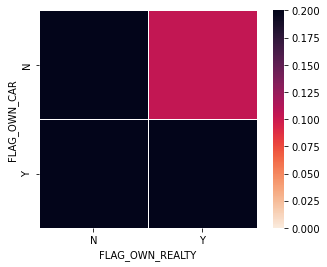

In [22]:
""" Cette fonction affiche une heatmap de la distance entre les données observées et les données théoriques attendues 
Entrées :
df : le dataframe
X : la première variable qualitative
Y : la deuxième veriable qualitative"""
# Heatmap de la distance entre les données observées et les données théoriques attendues  pour les variables 'FLAG_OWN_CAR' et 'FLAG_OWN_REALTY'
tableau_chi_2_color(app_train_khi_2, 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY')

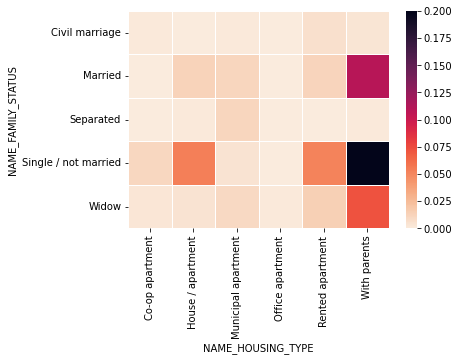

In [23]:
# Heatmap de la distance entre les données observées et les données théoriques attendues  pour les variables 'NAME_FAMILY_STATUS' et 'NAME_HOUSING_TYPE'
tableau_chi_2_color(app_train_khi_2, 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE')

Les différentes heatmap corroborent bien la dépendance entre les variables qualitatives (qui était déjà établie avec le test du CHI-2)

In [24]:
del app_train_khi_2

#### Les variables quantitatives (float)

###### La variable AMT_INCOME_TOTAL

La variable AMT_INCOME_TOTAL représente le revenu total annuel du client au moment de la demande. Pour davantage de visibilité, les montants en dollars sont convertis en k$.

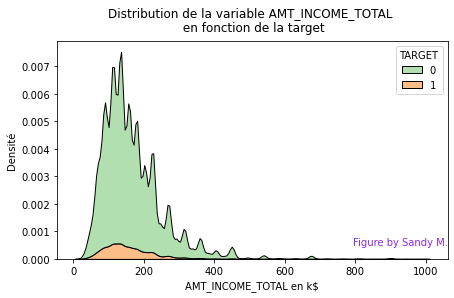

In [25]:
""" Cette fonction affiche la distribution d'une variable en faisant une distinction avec une variable cible 
Entrées :
data : le dataframe
var : la variable à représenter
var_target : la variable cible
x_label : la légende pour l'axe des abscisses """

# distribution de la variable "AMT_INCOME_TOTAL" en distinguant la variable "TARGET"
my_vis.graph_hue_target(
    application_train[application_train.AMT_INCOME_TOTAL < 1000],
    "AMT_INCOME_TOTAL",
    "TARGET",
    x_label='AMT_INCOME_TOTAL en k$')

Sur ce graphique, il n'est pas possible de visualiser une tendance pour les prêts remboursés et pour ceux non-remboursés. Néanmoins, il donne l'impression que les clients qui ont un revenu annuel supérieur à 400 k$ ont toujours remboursé leur prêt.

Classer un client uniquement par le montant annuel de ses revenus n'est pas suffisant. Il est important de comparer ses revenus à ceux qui ont le même type de métier, le même travail ainsi que la même éducation. C'est l'objet des trois nouvelles variables créées en suivant.

Ce montant permet de pouvoir positionner un client par rapport à l'endroit où il travail, son type de poste et son niveau d'éducation.

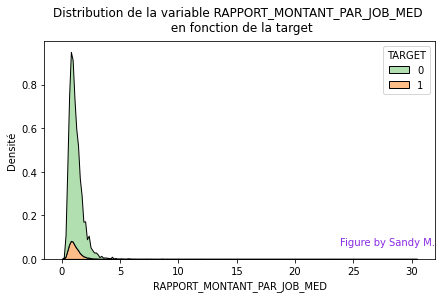

In [26]:
""" Cette fonction permet de créer une variable qui calcule le rapport entre la variable 'AMT_INCOME_TOTAL' du client
et la médiane de la variable 'AMT_INCOME_TOTAL' pour ceux qui ont les mêmes caractéristiques (job, poste, education)

Entrées :
dataframe : le dataframe

Renvoie :
dataframe : le dataframe avec les 3 nouvelles variables : 
    'RAPPORT_MONTANT_PAR_JOB_MED'
    'RAPPORT_MONTANT_PAR_POSTE_MED'
    'RAPPORT_MONTANT_PAR_EDU_MED'
"""
# Ajout des variables : 'RAPPORT_MONTANT_PAR_JOB_MED', 'RAPPORT_MONTANT_PAR_POSTE_MED' et 'RAPPORT_MONTANT_PAR_EDU_MED'
application_train = my_sp4.ajout_rapport_montant(application_train)

# distribution de la variable "'RAPPORT_MONTANT_PAR_JOB_MED'en distinguant la variable "TARGET"
my_vis.graph_hue_target(application_train,
                        'RAPPORT_MONTANT_PAR_JOB_MED',
                        "TARGET",
                        x_label='RAPPORT_MONTANT_PAR_JOB_MED')

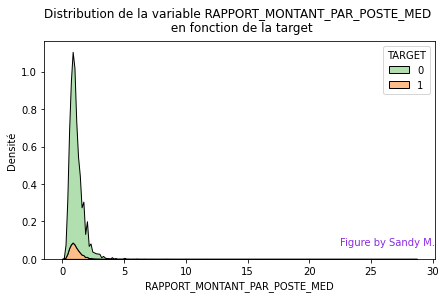

In [27]:
# distribution de la variable 'RAPPORT_MONTANT_PAR_POSTE_MED' en distinguant la variable "TARGET"
my_vis.graph_hue_target(application_train,
                        'RAPPORT_MONTANT_PAR_POSTE_MED',
                        "TARGET",
                        x_label='RAPPORT_MONTANT_PAR_POSTE_MED')

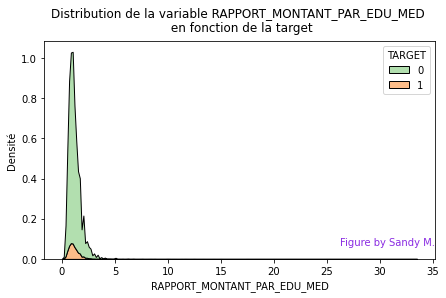

In [28]:
# distribution de la variable 'RAPPORT_MONTANT_PAR_EDU_MED' en distinguant la variable "TARGET"
my_vis.graph_hue_target(application_train,
                        'RAPPORT_MONTANT_PAR_EDU_MED',
                        "TARGET",
                        x_label='RAPPORT_MONTANT_PAR_EDU_MED')

Aucune surprise quant à l'observation disant que plus le rapport entre le montant annuel des revenus d'un client et celui de quelqu'un qui lui ressemble est élevé, plus le prêt est remboursé.

###### La variable AMT_CREDIT

La variable AMT_CREDIT correspond au montant emprunté.

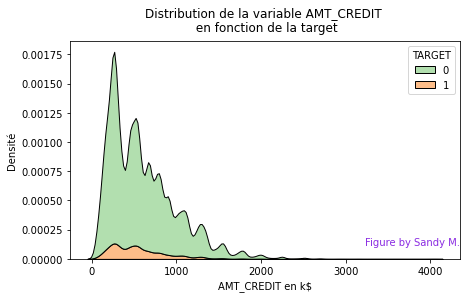

In [29]:
# distribution de la variable 'AMT_CREDIT' en distinguant la variable "TARGET"
my_vis.graph_hue_target(application_train,
                        'AMT_CREDIT',
                        'TARGET',
                        x_label='AMT_CREDIT en k$')

Les prêts qui ne sont pas remboursés entièrement ne sont pas forcément les prêts avec les montants les plus importants.

Pour mieux apprécier cette variable, une nouvelle variable correspondant au rapport entre le montant du crédit et le montant annuel des revenus du client est créée.

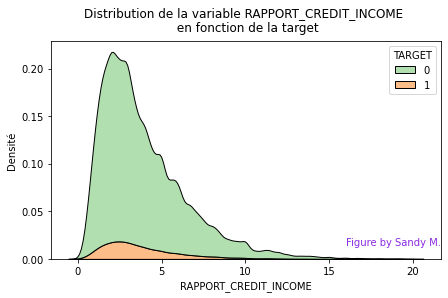

In [30]:
application_train['RAPPORT_CREDIT_INCOME'] = application_train[
    'AMT_CREDIT'] / application_train['AMT_INCOME_TOTAL']

# distribution de la variable 'RAPPORT_CREDIT_INCOME'en distinguant la variable "TARGET"
my_vis.graph_hue_target(
    application_train[application_train.RAPPORT_CREDIT_INCOME < 20],
    'RAPPORT_CREDIT_INCOME',
    'TARGET',
    x_label='RAPPORT_CREDIT_INCOME')

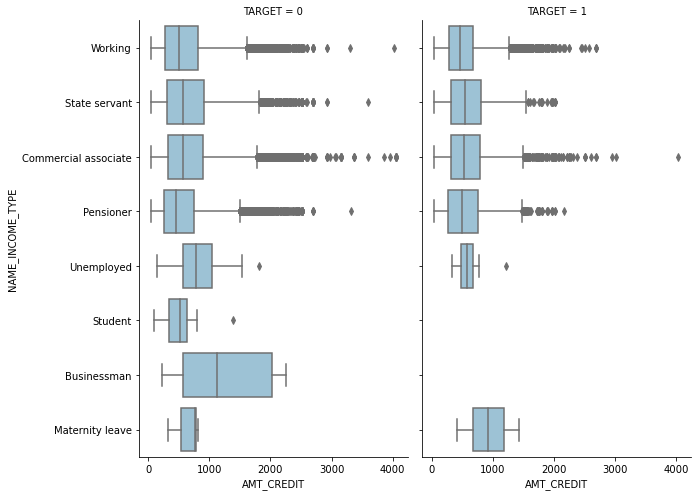

In [31]:
sns.catplot(x="AMT_CREDIT",
            y="NAME_INCOME_TYPE",
            col="TARGET",
            data=application_train,
            color=a(0.4),
            kind="box",
            height=7,
            aspect=.7)
plt.show()

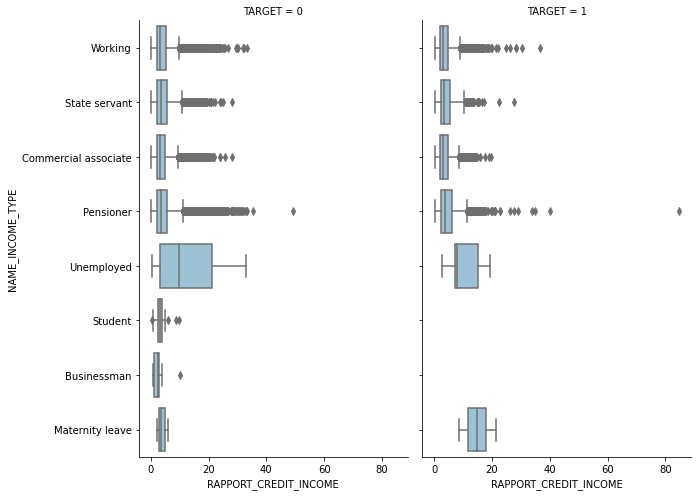

In [32]:
sns.catplot(x="RAPPORT_CREDIT_INCOME",
            y="NAME_INCOME_TYPE",
            col="TARGET",
            data=application_train,
            color=a(0.4),
            kind="box",
            height=7,
            aspect=.7)
plt.show()

Deux types de "NAME_INCOME_TYPE" n'ont pas de clients qui ne remboursent pas leur prêt. Il s'agit des étudiants et des businessmen. Pour les modalités "Unemployed" et "maternity leave" (attention cette dernière est très minoritaire), la cible fait varier la distribution des rapports montant des revenus/montant du prêt.

###### La variable AMT_ANNUITY

La variable AMT_ANNUITY fait référence à la mensualité de remboursement.

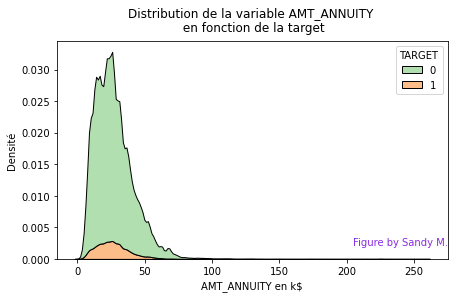

In [33]:
# distribution de la variable ''AMT_ANNUITY' en distinguant la variable "TARGET"
my_vis.graph_hue_target(application_train,
                        'AMT_ANNUITY',
                        'TARGET',
                        x_label='AMT_ANNUITY en k$')

Encore une fois, les défauts de remboursement ne sont pas sur des montants élevés.

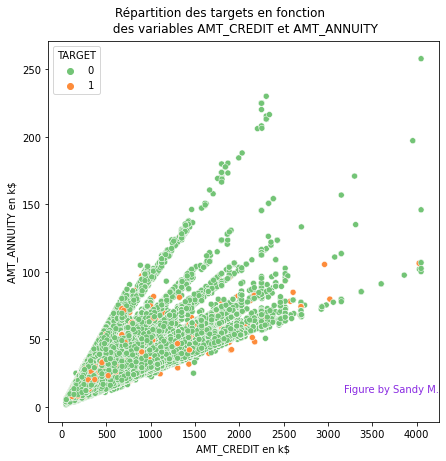

In [34]:
""" Cette fonction affiche une représentation en nuage de points pour une variable par rapport à une autre
La couleur des points dépend d'une variable cible
Entrées :
data : le dataframe
col1 : la premiere variable
col2 : la deuxième variable
var_cible : la variable cible dont dépend la couleur des points
x_label : la légende de l'axe des abscisses
y_label : la légende de l'axe des ordonnées"""

# Représentation en nuage de points pour la variable "AMT_CREDIT" par rapport à la variable "AMT_ANNUITY"
my_vis.scatter_target(application_train, "AMT_CREDIT", "AMT_ANNUITY", "TARGET",
                      'AMT_CREDIT en k$', 'AMT_ANNUITY en k$')

Sur cette représentation on remarque une corrélation entre le montant du crédit et le montant de la mensualité (ce qui est normal car la mensualité est simplement le montant du crédit divisé par sa durée).

Une nouvelle variable est créée, il  s'agit du rapport entre la mensualité et le montant des revenus annuels.

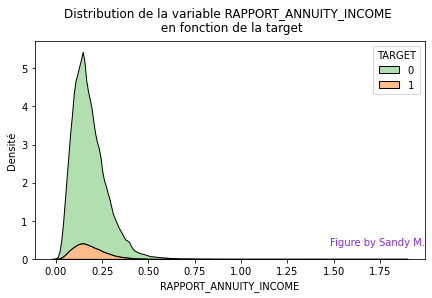

In [35]:
application_train['RAPPORT_ANNUITY_INCOME'] = application_train[
    'AMT_ANNUITY'] / application_train['AMT_INCOME_TOTAL']

# distribution de la variable 'RAPPORT_ANNUITY_INCOME' en distinguant la variable "TARGET"
my_vis.graph_hue_target(application_train, 'RAPPORT_ANNUITY_INCOME', "TARGET",
                        'RAPPORT_ANNUITY_INCOME')

Là encore, les rapports les plus importants sont ceux qui sont des prêts intégralement remboursés.

Les variables 'EXT_SOURCE_' représentent un score normalisé (entre 0 et 1) des ressources extérieures des clients.

In [36]:
colonnes_EXT = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
application_train[colonnes_EXT].describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,307506.000000,307506.000000,307506.000000
mean,0.219022,0.513288,0.409578
std,0.285373,0.192333,0.268177
min,0.000000,0.000000,0.000000
25%,0.000000,0.390781,0.178760
50%,0.000000,0.565467,0.459690
75%,0.456257,0.663422,0.636376
max,0.962693,0.855000,0.896010


Les trois ressources ont des distributions assez différentes.

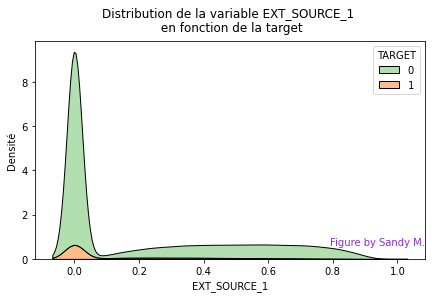

In [37]:
# distribution de la variable 'EXT_SOURCE_1' en distinguant la variable "TARGET"
my_vis.graph_hue_target(application_train, 'EXT_SOURCE_1', "TARGET",
                        'EXT_SOURCE_1')

Dans l'ensemble, les prêts non remboursés ont un score numéro 1 égal à 0.

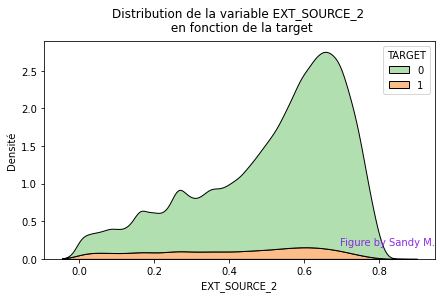

In [38]:
# distribution de la variable 'EXT_SOURCE_2' en distinguant la variable "TARGET"
my_vis.graph_hue_target(application_train, 'EXT_SOURCE_2', "TARGET",
                        'EXT_SOURCE_2')

Par contre, pour la ressource numéro 2, il n'y a pas vraiment de tendance suivant que le prêt est remboursé ou non.

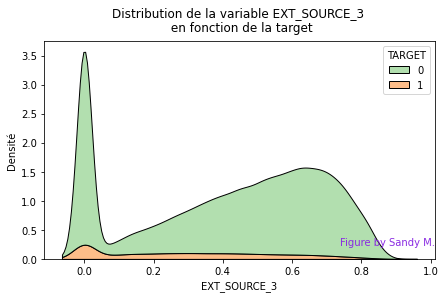

In [39]:
# distribution de la variable 'EXT_SOURCE_3' en distinguant la variable "TARGET"
my_vis.graph_hue_target(application_train, 'EXT_SOURCE_3', "TARGET",
                        'EXT_SOURCE_3')

Une variable reflétant la moyenne de ces 3 scores est créée.

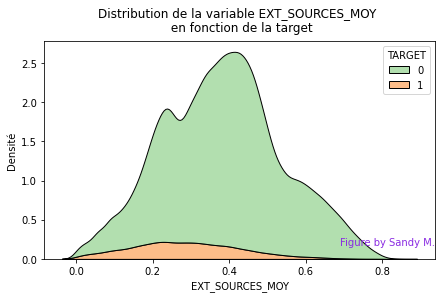

In [40]:
application_train['EXT_SOURCES_MOY'] = application_train[[
    'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'
]].mean(axis=1)

# distribution de la variable 'EXT_SOURCES_MOY' en distinguant la variable "TARGET"
my_vis.graph_hue_target(application_train, 'EXT_SOURCES_MOY', "TARGET",
                        'EXT_SOURCES_MOY')

Dans l'ensemble, les prêts non remboursés ont un score moyen de ressources externes inférieur à 0.6.

#### Distribution de classes

##### La variable "DAYS_BIRTH"

La variable DAYS_BIRTH compte le nombre de jours depuis la naissance du client. Pour la transformer en âge, il suffit de la diviser par 365.

La variable a un minimum de 20 ans et un maximum de 69 ans, c'est tout à fait plausible. Il n'y a pas de valeurs abérrantes au sein de cette variable.

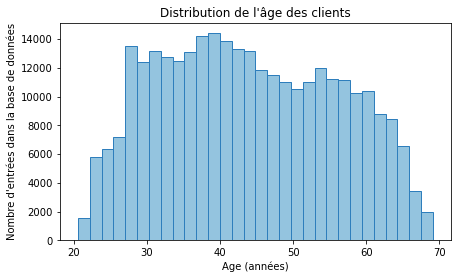

In [41]:
# Histogramme vertical de la répartition de l'âge des clients en années
plt.figure(figsize=(7, 4))
plt.hist(application_train['DAYS_BIRTH'] / 365,
         edgecolor=a(0.7),
         color=a(0.4),
         bins=30)
plt.title("Distribution de l'âge des clients")
plt.xlabel('Age (années)')
plt.ylabel("Nombre d'entrées dans la base de données")
plt.show()

Cette représentation montre la distribution des âges en années au sein de la base de données. La distribution est plutôt uniforme entre 30 et 60 ans. Il est intéressant de regarder cette distribution en mettant en exergue la valeur associée au sein de la variable cible.

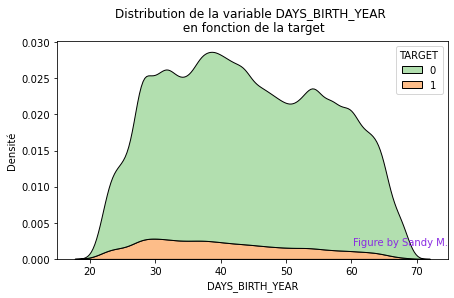

In [42]:
# Conversion de l'âge des clients en années
application_train['DAYS_BIRTH_YEAR'] = application_train['DAYS_BIRTH'] / 365
# distribution de la variable 'DAYS_BIRTH_YEAR' en distinguant la variable "TARGET"
my_vis.graph_hue_target(application_train, 'DAYS_BIRTH_YEAR', "TARGET",
                        'DAYS_BIRTH_YEAR')

Pour pouvoir mieux appréhender la variable qui donne l'âge du client, il est judicieux de regrouper les entrées par classe d'âge (chaque classe ayant une étendue de 5 ans)

Cette nouvelle base de données regroupe l'intégralité des entrées pour la variable TARGET et ma variable DAYS_BIRTH ainsi que deux nouvelles variables, YEARS_BIRTH (l'âge en années) et YEARS_GROUP (la classe d'âge).

En regroupant les entrées par classe et en faisant la moyenne des cibles, il est possible de voir si des classes d'âge particulières ont tendance à plutôt rembourser leur prêt ou non. Plus la moyenne est proche de 0, plus les clients de la classe d'âge ont remboursé leur crédit. Il est facile de voir que plus l'âge augmente, plus les clients ont tendance à rembourser leur prêt.


*Fonction by Sandy M.*

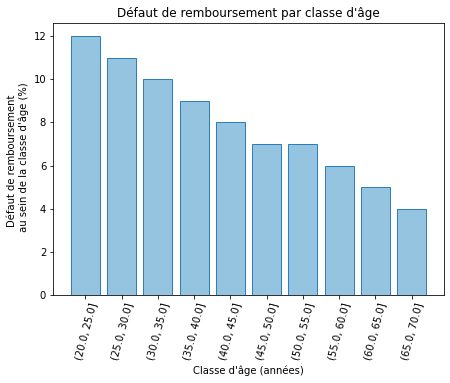

In [43]:
""" Cette fonction crée des groupes d'âge des clients
Entrées :
dataframe : le dataframe
nb_group : le nombre de groupe souhaité

Renvoie :
age_groups : un dataframe avec les groupes d'âge en index """

# Création d'un dataframe avec comme index 10 groupes d'âge
age_groups = my_sp4.groupes_age(application_train, 10)

plt.figure(figsize=(7, 5))
plt.bar(age_groups.index.astype(str),
        100 * age_groups['TARGET'],
        color=a(0.4),
        edgecolor=a(0.7))

plt.xticks(rotation=75)
plt.xlabel("Classe d'âge (années)")
plt.ylabel("Défaut de remboursement \n au sein de la classe d'âge (%)")
plt.title("Défaut de remboursement par classe d'âge")
plt.show()

Cette représentation graphique montre la tendance selon laquelle, plus le client appartient a une classe d'âge  avancé, plus il a remboursé son crédit. L'âge a donc une grande influence sur le remboursement du crédit. Elle sera une variable importante pour faire des prédictions.

In [44]:
del age_groups

##### La variable "DAYS_EMPLOYED"

La variable "DAYS_EMPLOYED" correspond au nombre de jour d'emploi jusqu'à la date de demande de crédit. Avant le nettoyage des données, il a été étrange de voir des valeurs positives, surtout une valeur à 365243 ! Qui correspondrait à 1000 ans !


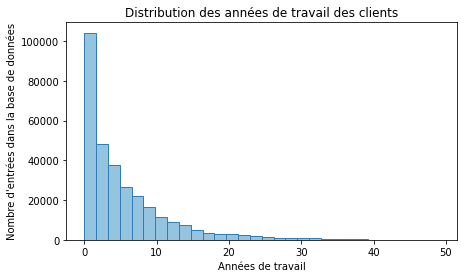

In [45]:
# Histogramme vertical de la représentation des années de travail des clients
plt.figure(figsize=(7, 4))
plt.hist(application_train['DAYS_EMPLOYED'] / 365,
         edgecolor=a(0.7),
         color=a(0.4),
         bins=30)
plt.title("Distribution des années de travail des clients")
plt.xlabel('Années de travail')
plt.ylabel("Nombre d'entrées dans la base de données")
plt.show()

Cette représentation montre la distribution des années de travail des clients en années au sein de la base de données. La distribution montre une diminution du nombre d'entrées dans la base de données quand le nombre d'années de travail augmente. Il est intéressant de regarder cette distribution en mettant en exergue la valeur associée au sein de la variable cible.

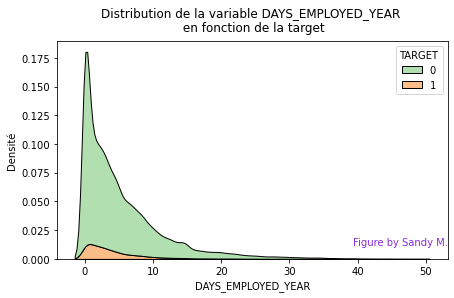

In [46]:
# Conversion de la durée de travail des clients en années
application_train[
    'DAYS_EMPLOYED_YEAR'] = application_train['DAYS_EMPLOYED'] / 365

# distribution de la variable 'DAYS_EMPLOYED_YEAR' en distinguant la variable "TARGET"
my_vis.graph_hue_target(application_train, 'DAYS_EMPLOYED_YEAR', 'TARGET',
                        'DAYS_EMPLOYED_YEAR')

Pour pouvoir mieux appréhender la variable qui donne le nombre d'années de travail du client, il est judicieux de regrouper les entrées par classe de durée de travail (chaque classe ayant une étendue de 5 ans)

Cette nouvelle base de données regroupe l'intégralité des entrées pour la variable TARGET et ma variable DAYS_EMPLOYED ainsi que deux nouvelles variables, YEARS_EMPLOYED  (le temps de travail en années) et YEARS_GROUP (la classe de la durée du temps de travail en années).

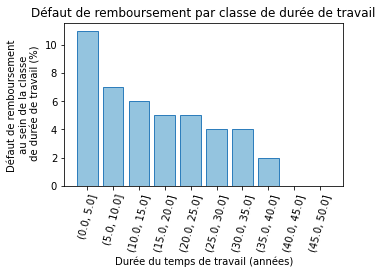

In [47]:
""" Cette fonction crée des groupes d'années de travail
Entrées :
dataframe : le dataframe
nb_group : le nombre de groupes souhaité

Renvoie :
duree_groups : un dataframe avec les groupes de durée de travail en index"""

# Création d'un dataframe avec comme index 10 groupes de durée (en années) de travail
duree_groups = my_sp4.groupes_duree_empl(application_train, 10)

plt.figure(figsize=(5, 3))

plt.bar(duree_groups.index.astype(str),
        100 * duree_groups['TARGET'],
        color=a(0.4),
        edgecolor=a(0.7))

plt.xticks(rotation=75)
plt.xlabel("Durée du temps de travail (années)")
plt.ylabel(
    "Défaut de remboursement \n au sein de la classe \n de durée de travail (%)"
)
plt.title("Défaut de remboursement par classe de durée de travail")
plt.show()

Cette représentation graphique montre la tendance selon laquelle, plus le client a travaillé avant sa demande de prêt, plus il a remboursé son crédit. Le nombre d'années de travail au moment de la demande de prêt a donc une grande influence sur le remboursement du crédit. Elle sera une variable importante pour faire des prédictions.

In [48]:
del duree_groups

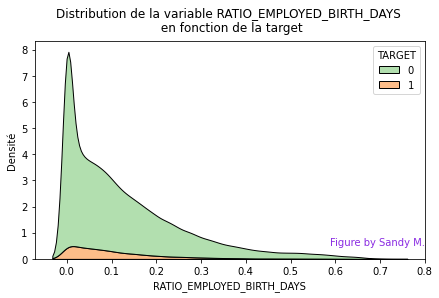

In [49]:
# Création d'une variable étant le ratio nombre de jours de travail / nombre de jours depuis la naissance
application_train['RATIO_EMPLOYED_BIRTH_DAYS'] = application_train[
    'DAYS_EMPLOYED'] / application_train['DAYS_BIRTH']

# distribution de la variable 'RATIO_EMPLOYED_BIRTH_DAYS' en distinguant la variable "TARGET"
my_vis.graph_hue_target(application_train, 'RATIO_EMPLOYED_BIRTH_DAYS',
                        'TARGET', 'RATIO_EMPLOYED_BIRTH_DAYS')


*Fonction by Sandy M.*

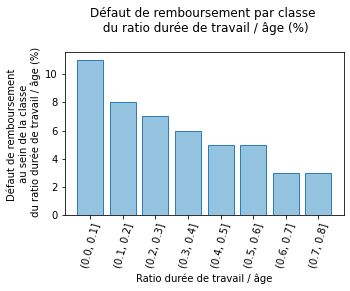

In [50]:
""" Cette fonction crée des groupes en fonction 
du ratio nombre de jours de travail / nombre de jours depuis la naissance
Entrées:
dataframe : le dataframe
nb_group : le nombre de groupes souhaité
"""

# Création d'un dataframe avec 8 groupes de ratio nombre de jours de travail / nombre de jours depuis la naissance en index
ratio_groups = my_sp4.groupes_ratio(application_train, 8)

plt.figure(figsize=(5, 3))

plt.bar(ratio_groups.index.astype(str),
        100 * ratio_groups['TARGET'],
        color=a(0.4),
        edgecolor=a(0.7))

plt.xticks(rotation=75)
plt.xlabel("Ratio durée de travail / âge")
plt.ylabel(
    "Défaut de remboursement \n au sein de la classe \n du ratio durée de travail / âge (%)"
)
plt.title(
    "Défaut de remboursement par classe \n du ratio durée de travail / âge (%)",
    pad=20)
plt.show()

In [51]:
del ratio_groups, application_train

## La base de données "bureau"

In [52]:
bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


La base de données bureau regroupe les données des précédents crédits du clients accordés par d'autres banques. Chaque ligne correspond a un crédit, mais un client demandant un prêt peu avoir plusieurs lignes (plusieurs crédits en cours).
( 1 ligne dans la base de données application_train/test = 1 ou plusieurs lignes dans la base de données bureau)

Afin d'intégrer des informations de cette base de données dans la base de données d'entraînement il faudra pour chaque variable trouver une façon de la résumer pour l'ensemble des crédits pris pour chaque client.

In [53]:
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

### Quantification des valeurs manquantes

Regardons si les variables contiennent beaucoup de valeurs manquantes.

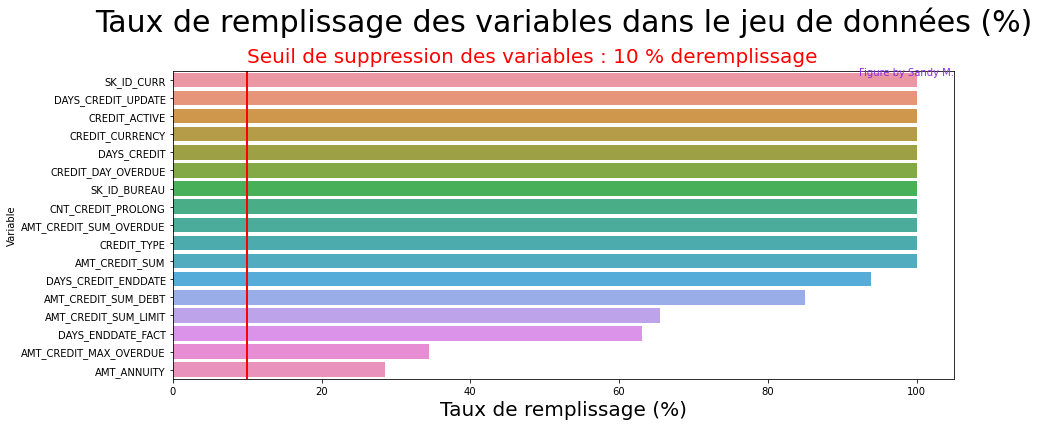

In [54]:
# Histogramme des remplissages des variables
my_desc.graphique_remplissage(bureau, 10)

Toutes les variables ont un taux de remplissage supérieur à 10%. Elles vont toutes être conservées. Après l'examen des différentes variables il faudra trouver un moyen d'imputer les valeurs manquantes.

### Les variables quantitatives

##### La variable SK_ID_BUREAU

Cette variable permet de calculer le nombre de prêt par client.

In [55]:
""" Cette fonction ajoute une variable qui a pour valeur le nombre de prêt par client 
Entrées : 
bureau : dataframe bureau avec les variables 'SK_ID_CURR' et 'SK_ID_BUREAU' 
Renvoie :
bureau['NB_CREDIT_CLIENT'] : le vecteur de la nouvelle variable qui a pour valeur le nombre de prêt par client 
"""
# Création d'une variable 'NB_CREDIT_CLIENT'
bureau['NB_CREDIT_CLIENT'] = my_sp4.ajout_nb_pret(
    bureau[['SK_ID_CURR', 'SK_ID_BUREAU']])

In [56]:
bureau[bureau.SK_ID_CURR == 215354][[
    'SK_ID_CURR', 'SK_ID_BUREAU', 'NB_CREDIT_CLIENT'
]]

,SK_ID_CURR,SK_ID_BUREAU,NB_CREDIT_CLIENT
0,215354,5714462,11
1,215354,5714463,11
2,215354,5714464,11
3,215354,5714465,11
4,215354,5714466,11
5,215354,5714467,11
6,215354,5714468,11
225157,215354,5714458,11
225158,215354,5714459,11
225159,215354,5714460,11


##### La variable "DAYS_CREDIT"

La variable "DAYS_CREDIT" représente le nombre de jours entre la date de la demande du prêt (de la base de données application_train ou test) et la demande correspondant à la base de données "bureau".

La majorité des clients a fait une demande "bureau" entre 500 et 1000 jours avant leur demande à "application".

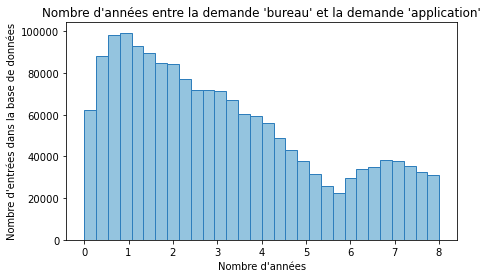

In [57]:
bureau['DAYS_CREDIT'] = abs(bureau['DAYS_CREDIT'])

plt.figure(figsize=(7, 4))

plt.hist(bureau['DAYS_CREDIT'] / 365, edgecolor=a(0.7), color=a(0.4), bins=30)
plt.title(
    "Nombre d'années entre la demande 'bureau' et la demande 'application'")
plt.xlabel("Nombre d'années")
plt.ylabel("Nombre d'entrées dans la base de données")
plt.show()

##### La variable CREDIT_DAY_OVERDUE

Grâce à cette variable, il est possible de construire une variable qui rend compte du nombre total de jours de dépassement pour l'ensemble des crédits ainsi qu'une variable qui donne la moyenne de jours de dépassement.

In [58]:
""" Cette fonction ajoute deux variables : la première avec la moyenne du nombre de jour de dépassement du crédit et la deuxième avec le nombre total de jours de dépassement des crédits.
Entrées :
bureau : la base de données bureau avec les variables 'SK_ID_CURR' et 'CREDIT_DAY_OVERDUE'
Renvoie :
bureau['MOY_J_DEPASS'] : variable dont la valeur est la moyenne du nombre de jour de dépassement du crédit
bureau['NB_TOT_J_DEPASS'] : variable dont la valeur est le nombre total de jours de dépassement des crédits
"""
# Ajout d'une variable avec la moyenne du nombre de jour de dépassement du crédit et d'une autre variable avec le nombre total de jours de dépassement des crédits.
bureau['MOY_J_DEPASS'], bureau[
    'NB_TOT_J_DEPASS'] = my_sp4.ajout_depassement_credit(
        bureau[['SK_ID_CURR', 'CREDIT_DAY_OVERDUE']])
bureau = bureau.drop(['CREDIT_DAY_OVERDUE'], axis=1)

In [59]:
bureau[bureau['SK_ID_CURR'] == 446640][[
    'SK_ID_CURR', 'SK_ID_BUREAU', 'NB_CREDIT_CLIENT', 'NB_TOT_J_DEPASS',
    'MOY_J_DEPASS'
]]

,SK_ID_CURR,SK_ID_BUREAU,NB_CREDIT_CLIENT,NB_TOT_J_DEPASS,MOY_J_DEPASS
2059,446640,5717021,9,100,11.1
2060,446640,5717023,9,100,11.1
2061,446640,5717024,9,100,11.1
2062,446640,5717025,9,100,11.1
2063,446640,5717026,9,100,11.1
2064,446640,5717027,9,100,11.1
2065,446640,5717028,9,100,11.1
2066,446640,5717029,9,100,11.1
1673771,446640,5717022,9,100,11.1


##### La variable 'CNT_CREDIT_PROLONG'

La variable 'CNT_CREDIT_PROLONG' représente le nombre de fois où la durée du crédit a été prolongée.

In [60]:
taux_non_prolong = (bureau[bureau['CNT_CREDIT_PROLONG'] == 0].shape[0] /
                    bureau.shape[0]) * 100
print(
    "Les crédits qui n'ont pas bénéficiés d'une prolongation représentent %.2f %% des valeurs de la base de données"
    % taux_non_prolong)

Les crédits qui n'ont pas bénéficiés d'une prolongation représentent 99.47 % des valeurs de la base de données


In [61]:
""" Cette fonction ajoute une variable qui a pour valeur le nombre de prolongation de crédit et la moyenne du nombre de propagation de crédit 
Entrées :
bureau : dataframe bureau avec les variables 'SK_ID_CURR' et 'CNT_CREDIT_PROLONG'
Renvoie :
bureau['MOY_PROLONG'] = variable qui a pour valeur la moyenne du nombre de propagation de crédit
bureau['NB_PROLONG'] = variable qui a pour valeur le nombre de prolongation de crédit
"""
# ajout d'une variable avec la moyenne du nombre de crédits prolongés et la somme du nombre de crédits prolongés
bureau['MOY_PROLONG'], bureau['NB_PROLONG'] = my_sp4.ajout_prolong_credit(
    bureau[['SK_ID_CURR', 'CNT_CREDIT_PROLONG']])
bureau = bureau.drop(['CNT_CREDIT_PROLONG'], axis=1)

In [62]:
bureau[bureau['NB_PROLONG'] > 0][[
    'SK_ID_CURR', 'SK_ID_BUREAU', 'NB_CREDIT_CLIENT', 'NB_PROLONG'
]].head(5)

,SK_ID_CURR,SK_ID_BUREAU,NB_CREDIT_CLIENT,NB_PROLONG
462,118247,5715070,8,2
463,118247,5715072,8,2
464,118247,5715073,8,2
465,118247,5715074,8,2
466,118247,5715075,8,2


### Les variables de catégories

##### La variable "CREDIT_ACTIVE"

In [63]:
bureau['CREDIT_ACTIVE'].value_counts()

Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64

In [64]:
bureau['CREDIT_ACTIVE'].unique()

array(['Closed', 'Active', 'Sold', 'Bad debt'], dtype=object)

La variable "CREDIT_ACTIVE" contient 4 modalités :
    - 'Closed'
    - 'Active'
    - 'Sold'
    - 'Bad debt'

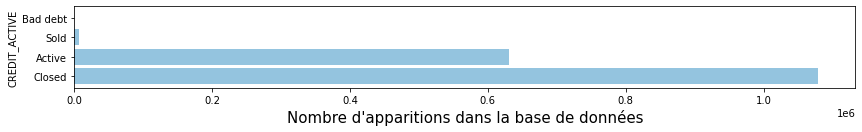

In [65]:
para = int(len(bureau['CREDIT_ACTIVE'].value_counts()) * 3)
fig = plt.figure(figsize=(14, para / 8))

fig = plt.barh(bureau['CREDIT_ACTIVE'].unique(),
               bureau['CREDIT_ACTIVE'].value_counts(),
               color=a(0.4))

plt.ylabel('CREDIT_ACTIVE')
plt.xlabel("Nombre d'apparitions dans la base de données", fontsize=15)
plt.show()

La majorité des crédits dans la base de données "bureau" a un statut "Closed" (fermé). Une autre partie importante de cette base de données a un statut "Active" (actif).
Une petite partie des crédits sont soit "Sold" (vendu) ou "Bad Debt" (créance irrécouvrable).

Comme la modalité Bad Debt et Sold sont similaires en signification et qu'elles ont un faible taux d'apparition dans la base de données, elles sont regroupées sous la même modalité "Sold or Bad Debt".

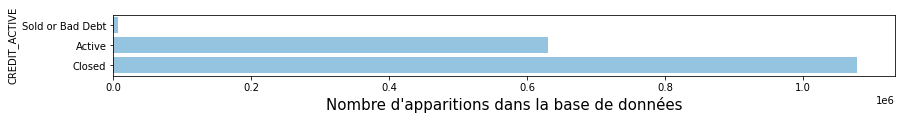

In [66]:
bureau['CREDIT_ACTIVE'].replace('Sold', 'Sold or Bad Debt', inplace=True)
bureau['CREDIT_ACTIVE'].replace('Bad debt', 'Sold or Bad Debt', inplace=True)

para = int(len(bureau['CREDIT_ACTIVE'].value_counts()) * 3)
fig = plt.figure(figsize=(14, para / 8))

fig = plt.barh(bureau['CREDIT_ACTIVE'].unique(),
               bureau['CREDIT_ACTIVE'].value_counts(),
               color=a(0.4))

plt.ylabel('CREDIT_ACTIVE')
plt.xlabel("Nombre d'apparitions dans la base de données", fontsize=15)
plt.show()

Pour pouvoir transporter cette information vers une base de données avec les SK_ID_CURR comme index, il va falloir créer 3 nouvelles colonnes qui rendent compte du nombre de "Closed", "Active" et "Sold or Bad Debt" par client.

Seules ces trois nouvelles variables seront ajoutées à la base de données d'entraînement.

In [67]:
""" Cette fonction ajoute 3 variables dont les valeurs correspondent à l'état du crédit :
code_clos = 1 si le crédit est 'Closed', 0 sinon
code_actif = 1 si le crédit est 'Active', 0 sinon
code_bad = 1 si le crédit est 'Sold or Bad Debt', 0 sinon
Ces 3 variables sont convertis en ratio suivant le nombre de crédit pour donner les nouvelles variables :
RATIO_CLOS	RATIO_ACTIF et	RATIO_BAD
Entrées :
bureau : le dataframe bureau
Renvoie :
bureau : le dataframe avec les 3 nouvelles variables
"""
# Ajout de 3 variables dont les valeur correspondent à l'état des crédits RATIO_CLOS, RATIO_ACTIF et RATIO_BAD
bureau = my_sp4.ajout_etat_credit(bureau)

In [68]:
bureau[bureau.SK_ID_CURR == 215354][[
    'SK_ID_CURR', 'SK_ID_BUREAU', 'RATIO_CLOS', 'RATIO_ACTIF', 'RATIO_BAD'
]]

,SK_ID_CURR,SK_ID_BUREAU,RATIO_CLOS,RATIO_ACTIF,RATIO_BAD
0,215354,5714462,0.45,0.55,0.0
1,215354,5714463,0.45,0.55,0.0
2,215354,5714464,0.45,0.55,0.0
3,215354,5714465,0.45,0.55,0.0
4,215354,5714466,0.45,0.55,0.0
5,215354,5714467,0.45,0.55,0.0
6,215354,5714468,0.45,0.55,0.0
225157,215354,5714458,0.45,0.55,0.0
225158,215354,5714459,0.45,0.55,0.0
225159,215354,5714460,0.45,0.55,0.0


##### La variable "CREDIT_CURRENCY"

In [69]:
bureau['CREDIT_CURRENCY'].value_counts()

currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: CREDIT_CURRENCY, dtype: int64

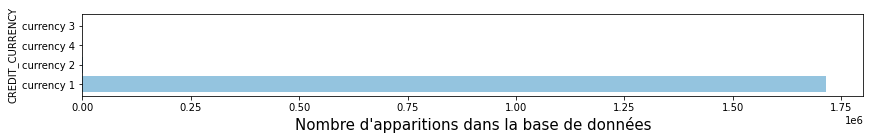

In [70]:
para = int(len(bureau['CREDIT_CURRENCY'].value_counts()) * 3)
fig = plt.figure(figsize=(14, para / 8))

fig = plt.barh(bureau['CREDIT_CURRENCY'].unique(),
               bureau['CREDIT_CURRENCY'].value_counts(),
               color=a(0.4))

plt.ylabel('CREDIT_CURRENCY')
plt.xlabel("Nombre d'apparitions dans la base de données", fontsize=15)
plt.show()

La variable 'CREDIT_CURRENCY' correspond à un codage propre à bureau. Elle ne sera ni remplacée par seulement ces chiffres pour éviter de mettre du poids sur ces modalités, ni modifiée en transvasant une modalité dans une autre.

Pour pouvoir être davantage précis, nous allons plutôt utiliser un ratio currency/nombre total de crédit.

In [71]:
""" Cette fonction ajoute 4 variables qui donnent le ratio entre le nb de currency et le nb  total de crédit du client.
Entrées :
bureau : le dataframe bureau avec les variables 'SK_ID_CURR', 'CREDIT_CURRENCY' et 'NB_CREDIT_CLIENT'
Renvoie :
bureau : le dataframe bureau avec les 4 nouvelles variables 
'RATIO_CURRENCY_1', 'RATIO_CURRENCY_2', 'RATIO_CURRENCY_3','RATIO_CURRENCY_4'"""

# ajout de 4 nouvelles variables
# 'RATIO_CURRENCY_1', 'RATIO_CURRENCY_2', 'RATIO_CURRENCY_3','RATIO_CURRENCY_4'
bureau = my_sp4.ajout_ratio_currency(bureau)

In [72]:
bureau[bureau.SK_ID_CURR == 215354][[
    'SK_ID_CURR', 'SK_ID_BUREAU', 'RATIO_CURRENCY_1', 'RATIO_CURRENCY_2',
    'RATIO_CURRENCY_3', 'RATIO_CURRENCY_4'
]]

,SK_ID_CURR,SK_ID_BUREAU,RATIO_CURRENCY_1,RATIO_CURRENCY_2,RATIO_CURRENCY_3,RATIO_CURRENCY_4
0,215354,5714462,1.0,0.0,0.0,0.0
1,215354,5714463,1.0,0.0,0.0,0.0
2,215354,5714464,1.0,0.0,0.0,0.0
3,215354,5714465,1.0,0.0,0.0,0.0
4,215354,5714466,1.0,0.0,0.0,0.0
5,215354,5714467,1.0,0.0,0.0,0.0
6,215354,5714468,1.0,0.0,0.0,0.0
225157,215354,5714458,1.0,0.0,0.0,0.0
225158,215354,5714459,1.0,0.0,0.0,0.0
225159,215354,5714460,1.0,0.0,0.0,0.0


##### La variable 'CREDIT_TYPE'

In [73]:
bureau['CREDIT_TYPE'].value_counts()

Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Mobile operator loan                                  1
Interbank credit                                      1
Name: CREDIT_TYPE, dtype: int64

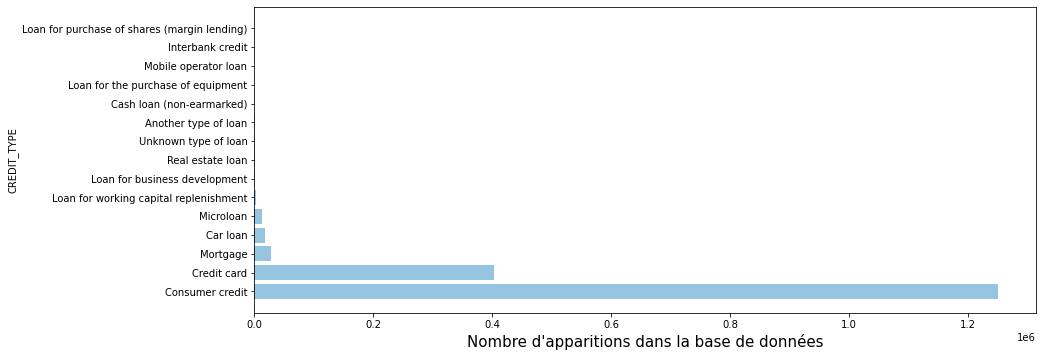

In [74]:
para = int(len(bureau['CREDIT_TYPE'].value_counts()) * 3)
fig = plt.figure(figsize=(14, para / 8))

fig = plt.barh(bureau['CREDIT_TYPE'].unique(),
               bureau['CREDIT_TYPE'].value_counts(),
               color=a(0.4))

plt.ylabel('CREDIT_TYPE')
plt.xlabel("Nombre d'apparitions dans la base de données", fontsize=15)
plt.show()

La majorité des crédits dans la base de données "bureau" sont de type "Consumer Credit" ou de type "Credit Card".

Cette variable permet de déterminer le nombre de type de crédit différent par clients. Par exemple, pour le client qui possède le SK_ID_CURR 215354, ce nombre sera égal à 3 car il a eu 3 types de crédit : "consumer credit", "credit card" et "car loan".

In [75]:
bureau[bureau.SK_ID_CURR == 215354][[
    'SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_TYPE'
]]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_TYPE
0,215354,5714462,Consumer credit
1,215354,5714463,Credit card
2,215354,5714464,Consumer credit
3,215354,5714465,Credit card
4,215354,5714466,Consumer credit
5,215354,5714467,Credit card
6,215354,5714468,Consumer credit
225157,215354,5714458,Consumer credit
225158,215354,5714459,Car loan
225159,215354,5714460,Consumer credit


In [76]:
type_credit_client = bureau[[
    'SK_ID_CURR', 'CREDIT_TYPE'
]].groupby(by=['SK_ID_CURR'])['CREDIT_TYPE'].nunique()
type_credit_client = type_credit_client.reset_index().rename(
    columns={'CREDIT_TYPE': 'TYPE_CREDIT_CLIENT'})
bureau = bureau.merge(type_credit_client, on='SK_ID_CURR', how='left')

In [77]:
bureau[bureau.SK_ID_CURR == 215354][[
    'SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_TYPE', 'TYPE_CREDIT_CLIENT'
]]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_TYPE,TYPE_CREDIT_CLIENT
0,215354,5714462,Consumer credit,3
1,215354,5714463,Credit card,3
2,215354,5714464,Consumer credit,3
3,215354,5714465,Credit card,3
4,215354,5714466,Consumer credit,3
5,215354,5714467,Credit card,3
6,215354,5714468,Consumer credit,3
225157,215354,5714458,Consumer credit,3
225158,215354,5714459,Car loan,3
225159,215354,5714460,Consumer credit,3


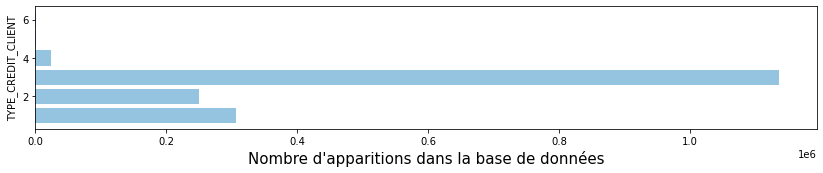

In [78]:
para = int(len(bureau['TYPE_CREDIT_CLIENT'].value_counts()) * 3)
fig = plt.figure(figsize=(14, para / 8))

fig = plt.barh(bureau['TYPE_CREDIT_CLIENT'].unique(),
               bureau['TYPE_CREDIT_CLIENT'].value_counts(),
               color=a(0.4))

plt.ylabel('TYPE_CREDIT_CLIENT')
plt.xlabel("Nombre d'apparitions dans la base de données", fontsize=15)
plt.show()

Dans la majorité des cas, les clients ont 3 types de crédit différents. Seule cette information sera conservée pour la passage à la base de données d'entraînement.

## La base de données "bureau_balance"

La base de données bureau_balance correspond aux données de la base de données bureau mais par mois. Chaque ligne correspond à un mois de crédit. Il y a autant de lignes que le crédit a de mois.

Le code "SK_ID_BUREAU" correspond au même code que dans la base de données "bureau".

In [79]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


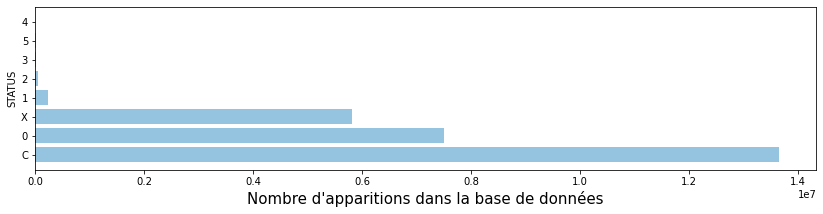

In [80]:
para = int(len(bureau_balance['STATUS'].value_counts()) * 3)
fig = plt.figure(figsize=(14, para / 8))

fig = plt.barh(bureau_balance['STATUS'].unique(),
               bureau_balance['STATUS'].value_counts(),
               color=a(0.4))

plt.ylabel('STATUS')
plt.xlabel("Nombre d'apparitions dans la base de données", fontsize=15)
plt.show()

In [81]:
bureau_balance['STATUS'].value_counts(dropna=False)

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64

In [82]:
bureau_balance = pd.get_dummies(bureau_balance, 'STATUS')

In [83]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,5715448,0,0,0,0,0,0,0,1,0
1,5715448,-1,0,0,0,0,0,0,1,0
2,5715448,-2,0,0,0,0,0,0,1,0
3,5715448,-3,0,0,0,0,0,0,1,0
4,5715448,-4,0,0,0,0,0,0,1,0


# Préparation des bases de données à partir des fonctions personnalisées de features engineering

## La base de données application_train seule

### Sans les nouvelles variables

In [84]:
application_train = pd.read_csv(chemin + "application_train.csv",
                                low_memory=False)

''' Cette fonction procède au nettoyage des variables
de la base de données application.
Elle effectue les opérations suivantes :
- Remplacement des valeurs erronées et des valeurs manquantes par "unknown"
- Conversion des $ en k$
- Correction du signe des données en jours
- Correction des valeurs aberrantes
- Imputation des valeurs manquantes par les moyennes ou les médianes.
Ces opérations ont été sélectionnées et mis en algorithme à la suite
d'une analyse exploratoire effectuée en amont.
Entrées :
df : le dataframe'''

df = my_sp4.clean_application(application_train)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(0)


*Fonction by Sandy M.*

La base de données avant nettoyage présente  307511 entrées pour  122 variables
~ Remplacement des valeurs erronées et des valeurs manquantes par "unknown" : effectué
~ Conversion des $ en k$ : effectué
~ Correction du signe des données en jours : effectué
~ Correction des valeurs aberrantes : effectué
~ Imputation des valeurs manquantes par les moyennes ou les médianes: effectué
~ Suppression des variables non-pertinentes pour cette étude : effectué

 -----L'étape de nettoyage des variables est terminée-----

La base de données après nettoyage présente 307506 entrées pour 56 variables.
 66 variables ont été écartées de l'étude et 56 variables ont été nettoyées


## Avec les nouvelles variables

In [85]:
application_train = pd.read_csv(chemin + "application_train.csv",
                                low_memory=False)

''' Cette fonction procède au nettoyage des variables
de la base de données application.
Ensuite, elle ajoute de nouvelles variables pertinentes
    à la base de données

Entrées :
df : le dataframe

Renvoie :
df : le dataframe nettoyé et avec de nouvelles variables'''
df = my_sp4.clean_fe_application(application_train)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(0)


*Fonction by Sandy M.*

La base de données avant nettoyage présente  307511 entrées pour  122 variables
~ Remplacement des valeurs erronées et des valeurs manquantes par "unknown" : effectué
~ Conversion des $ en k$ : effectué
~ Correction du signe des données en jours : effectué
~ Correction des valeurs aberrantes : effectué
~ Imputation des valeurs manquantes par les moyennes ou les médianes: effectué
~ Suppression des variables non-pertinentes pour cette étude : effectué

 -----L'étape de nettoyage des variables est terminée-----

La base de données après nettoyage présente 307506 entrées pour 56 variables.
 66 variables ont été écartées de l'étude et 56 variables ont été nettoyées
Ajout des variables 'MONTANT_PAR_JOB_MED',  'MONTANT_PAR_POSTE_MED' et 'MONTANT_PAR_EDU_MED'
Ajout des variables 'RAPPORT_CREDIT_INCOME',  'RAPPORT_ANNUITY_INCOME', 'RAPPORT_CREDIT_ANNUITY',  'RATIO_CREDIT_GOODS', 'EXT_SOURCES_MOY' et   'INCOME_PAR_MEMB_FAM'
Ajout des variables 'RATIO_CAR_BIRTH' et  'RATIO_PHONE_BIRTH'
Ajout des

### Les bases de données application_train et bureau + bureau_balance

In [86]:
application_train = pd.read_csv(chemin + "application_train.csv",
                                low_memory=False)

application_train = my_sp4.clean_fe_application(application_train)

bureau = pd.read_csv(chemin + "bureau.csv", low_memory=False)

""" Cette fonction procède au nettoyage et à l'ajout de nouvelles
variables pour la base de données bureau

Entrées :
bureau : base de données bureau
Renvoie :
bureau : base de données nettoyées avec les nouvelles variables"""
bureau = my_sp4.bureau_fe(bureau)

bureau_balance = pd.read_csv(chemin + "bureau_balance.csv", low_memory=False)

bb_net = my_sp4.bureau_and_balance_net(bureau, bureau_balance)

df = my_sp4.application_bureau(application_train, bb_net)

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(0)


*Fonction by Sandy M.*

La base de données avant nettoyage présente  307511 entrées pour  122 variables
~ Remplacement des valeurs erronées et des valeurs manquantes par "unknown" : effectué
~ Conversion des $ en k$ : effectué
~ Correction du signe des données en jours : effectué
~ Correction des valeurs aberrantes : effectué
~ Imputation des valeurs manquantes par les moyennes ou les médianes: effectué
~ Suppression des variables non-pertinentes pour cette étude : effectué

 -----L'étape de nettoyage des variables est terminée-----

La base de données après nettoyage présente 307506 entrées pour 56 variables.
 66 variables ont été écartées de l'étude et 56 variables ont été nettoyées
Ajout des variables 'MONTANT_PAR_JOB_MED',  'MONTANT_PAR_POSTE_MED' et 'MONTANT_PAR_EDU_MED'
Ajout des variables 'RAPPORT_CREDIT_INCOME',  'RAPPORT_ANNUITY_INCOME', 'RAPPORT_CREDIT_ANNUITY',  'RATIO_CREDIT_GOODS', 'EXT_SOURCES_MOY' et   'INCOME_PAR_MEMB_FAM'
Ajout des variables 'RATIO_CAR_BIRTH' et  'RATIO_PHONE_BIRTH'
Ajout des


*Fonction by Sandy M.*

Ajout de la variable 'NB_CREDIT_CLIENT'
Ajout des variables 'MOY_J_DEPASS', 'NB_TOT_J_DEPASS','MOY_PROLONG'et 'NB_PROLONG'
Ajout des variables  'RATIO_CLOS', 'RATIO_ACTIF' et 'RATIO_BAD'
Ajout des variables  'RATIO_CURRENCY_1', 'RATIO_CURRENCY_2','RATIO_CURRENCY_3', et 'RATIO_CURRENCY_4'
Ajout des variables  'RATIO_TYPE' et 'TYPE_CREDIT_CLIENT'
Ajout des variables 'MOY_DUREE_CREDIT', 'ratio_nb_retard','ratio_nb_avance','moy_ratio_jours_retard' et'moy_ratio_jours_avance'
Ajout des variables 'AMT_CREDIT_MAX_OVERDUE_k_MEAN','AMT_CREDIT_MAX_OVERDUE_k_MAX','AMT_CREDIT_SUM_k_MEAN','AMT_CREDIT_SUM_k_SUM'
Ajout des variables 'MOY_DEBT', 'SOMME_DEBT', 'MOY_LIMIT','SOMME_LIMIT', 'MOY_OVERDUE', 'SOMME_OVERDUE', 'MOY_ANNUITY'et 'SOMME_ANNUITY'
la base de données bureau a été nettoyée et 31 nouvelles variables ont été crées



*Fonction by Sandy M.*

les bases de données bureau et bureau_balance ont été assemblées
les bases de données bureau et bureau_balance ont été moyennées suivant SK_ID_CURR
df shape: (307506, 115)


### L'intégralité des bases de données

In [87]:
""" Cette fonction permet de rajouter les autres bases de données à la base de données application
Entrées :
df : la base de données application
chemin : le chemin des autres bases de données
Renvoie :
df : la base de données complêtée"""

df = my_sp4.ajout_all_bdd(df, chemin)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(0)

Previous applications df shape: (338857, 240)
Pos-cash balance df shape: (337252, 18)
Installments payments df shape: (339587, 24)
Credit card balance df shape: (103558, 141)
df shape: (307506, 538)


# Sources et inspirations

- inspiration pour le nettoyage et la transformation des données :

    https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features/script
    
    https://medium.com/analytics-vidhya/home-credit-default-risk-part-1-business-understanding-data-cleaning-and-eda-1203913e979c
    
    https://www.kaggle.com/c/home-credit-default-risk/discussion/64821
    
    https://www.kaggle.com/gpreda/home-credit-default-risk-extensive-eda
    
    https://medium.com/@dhruvnarayanan20/home-credit-default-risk-part-2-feature-engineering-and-modelling-i-be9385ad77fd